# Task 2
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic Dataset from Kaggle. Explore the relationships between the variables and identify the pattterns and trends in the data.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the titanic dataset

In [17]:
titanic = pd.read_csv("data/titanic_dataset.csv")

### Initial Exploration

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleaning

1. Check for missing values

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We observe that there are 177 null values in the 'Age' column and 687 null values in the 'Cabin' column. There are also two rows with missing values in the Embarked column.

2. Fill the missing values in 'Age' column with the median values of age.

In [21]:
median_age = titanic['Age'].median()
titanic['Age'].fillna(median_age, inplace=True)

3. Drop the 'Cabin' column as it has a large number of missing values.

In [22]:
titanic.drop('Cabin', axis=1, inplace=True)

4. Drop the rows with missing values in 'Embarked' column.

In [23]:
titanic.dropna(subset=['Embarked'], inplace=True)

5. Convert 'Sex' column which is categorical into numerical variable.

In [24]:
titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: category
Categories (2, object): ['female', 'male']

6. Drop irrelevant columns.

In [25]:
titanic.drop(['PassengerId', 'Name', 'Ticket',], axis=1, inplace=True)

> Now we can check the cleaned dataset.

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(1)
memory usage: 56.6+ KB


### Exploratory Data Analysis (EDA)

1. Analyze the distribution of passengers by age.

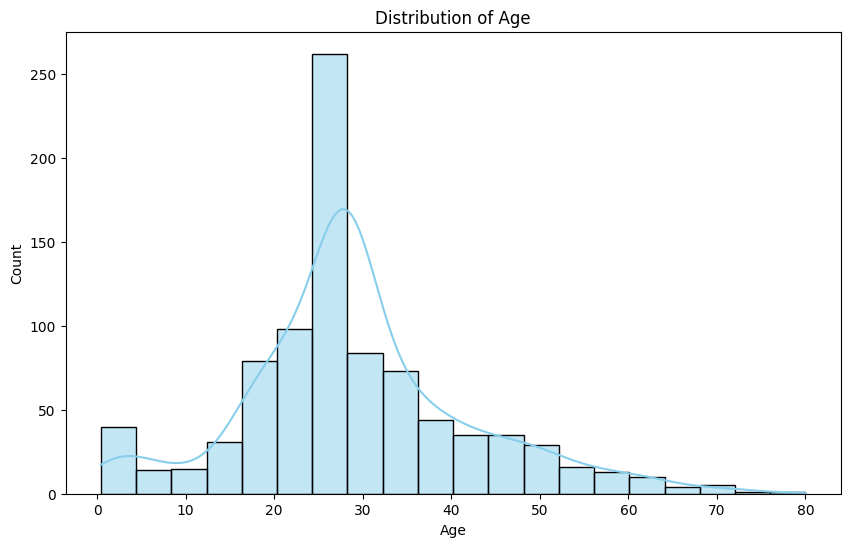

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

2. Explore the distribution of passengers by gender.

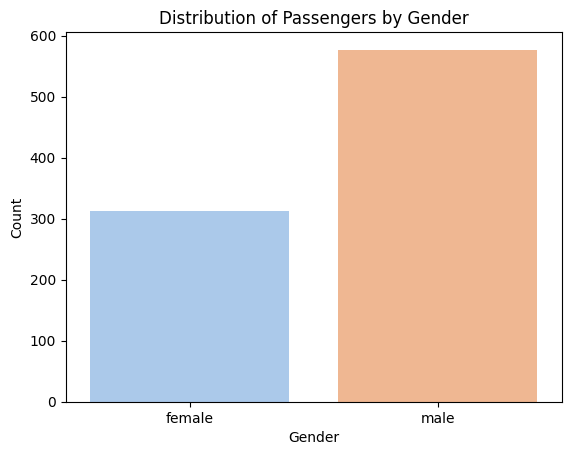

In [36]:
sns.countplot(x='Sex', hue='Sex', data=titanic, palette='pastel')
plt.title('Distribution of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

3. Explore the distribution of passengers by ticket class.

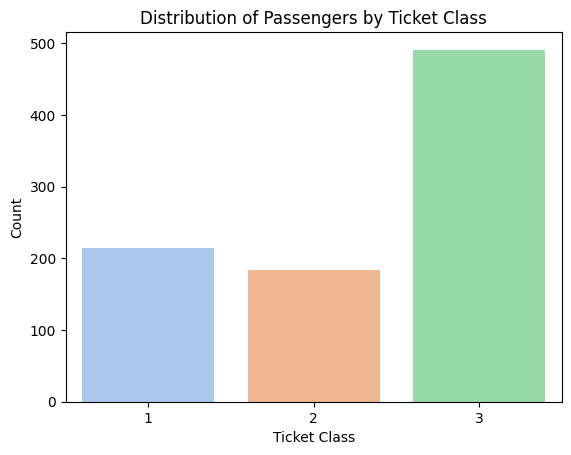

In [40]:
sns.countplot(x='Pclass', hue='Pclass', data=titanic, palette='pastel', legend=False)
plt.title('Distribution of Passengers by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.show()

4. Explore the survival rate by gender.

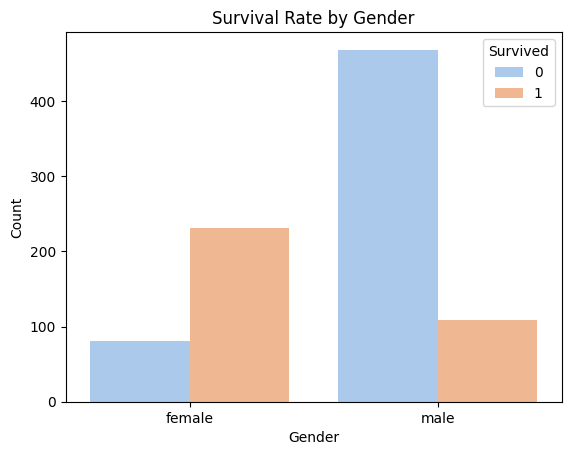

In [30]:
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

5. Explore the survival rate by ticket class.

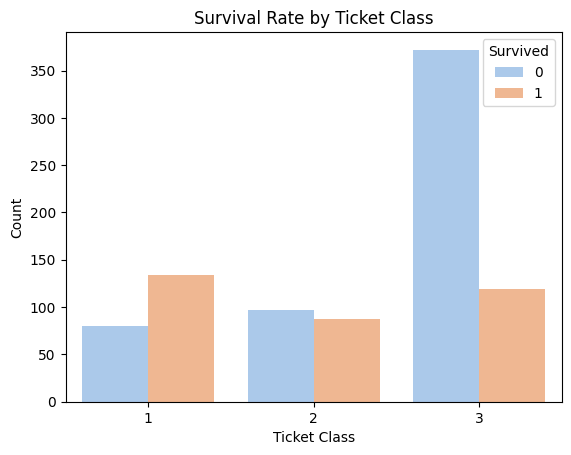

In [31]:
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='pastel')
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

6. Explore the correlation of values between different variables using a heatmap.

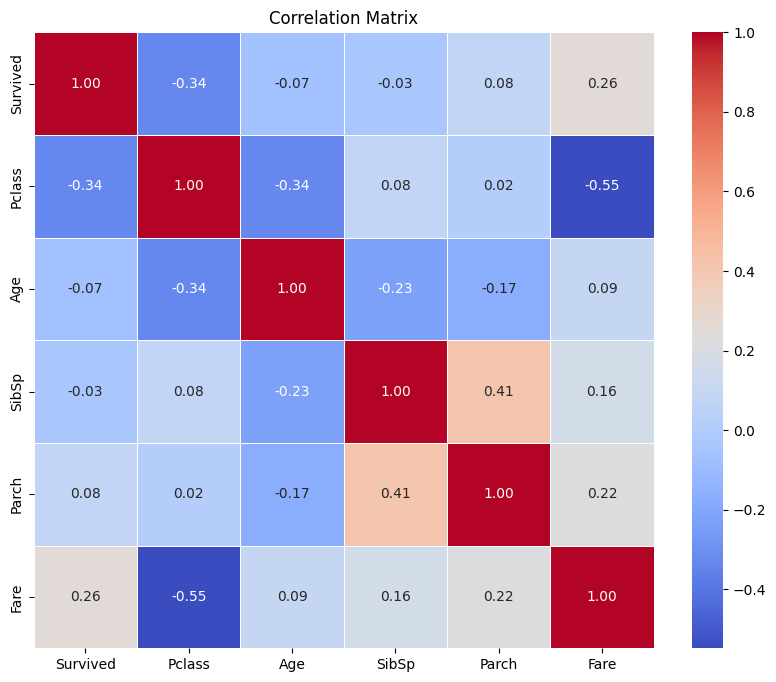

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()